In [38]:
import torch

In [39]:
print(torch.__version__)

1.12.1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline 

In [2]:
train=pd.read_csv('train_oil.csv')
test=pd.read_csv('test_oil.csv')
submission=pd.read_csv('submission_oil.csv')

In [5]:
test.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG',
       'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V',
       'V40', 'ZN'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns',None)
train.describe()

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
count,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,12701.000000,14095.000000,14095.000000,14095.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,14095.000000,3890.000000,14095.000000,11796.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,3890.000000,14095.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2118.000000,2118.000000,2118.000000,14095.000000,3724.000000,14095.000000,14095.000000,14095.000000
mean,3146.082937,2013.652501,7.600568,387.416885,0.025825,12.707698,64.026179,0.692799,0.006314,1366.757574,0.015589,0.028166,3.299468,34.560624,15.242159,7.138303,0.532905,12.495373,20.284319,8.783239,178.169280,0.185347,0.033650,3.611224,0.242568,33.477545,2.787939,23.992409,3.946222,0.730117,909.662788,1.659383,415.159631,12029.318624,0.476978,35.058248,0.909826,0.609254,0.707911,0.173575,0.417098,6.185233,29.870898,56.063472,239.938149,5488.693107,19415.597262,0.050656,13.576230,109.355815,588.646825,0.085349
std,4216.089809,3.964758,11.681628,550.016073,0.171926,86.968000,102.876871,2.905491,0.152189,1481.924727,0.209407,0.314249,28.595510,128.958953,17.591679,1.860775,0.621937,3.439535,3.234296,1.339355,533.208976,0.899253,0.809162,15.630404,2.190055,116.526762,11.131836,59.833922,17.914325,3.806716,564.388965,10.319130,1528.191012,9325.610196,2.729936,195.329029,3.604276,0.652382,6.897579,0.878892,1.626333,36.639482,97.459625,184.332678,685.053457,15474.146283,40145.311444,0.475438,1.073718,49.612379,531.743393,0.279411
min,1000.000000,2007.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,0.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,386.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,154.000000,0.000000,5.200000,2.900000,0.000000,0.000000
25%,1655.000000,2010.000000,3.000000,200.000000,0.000000,1.000000,3.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,1.000000,11.000000,6.000000,0.000000,10.000000,18.000000,8.100000,14.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,448.000000,0.000000,12.000000,4440.500000,0.000000,3.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,3.000000,5.000000,22.000000,636.750000,5409.250000,0.000000,12.900000,71.800000,37.000000,0.000000
50%,2227.000000,2014.000000,5.000000,200.000000,0.000000,2.000000,11.000000,0.000000,0.000000,198.000000,0.000000,0.000000,1.000000,4.000000,13.000000,7.000000,0.000000,12.000000,20.000000,8.700000,41.000000,0.000000,0.000000,2.000000,0.000000,6.000000,1.000000,1.000000,2.000000,0.000000,916.000000,0.000000,29.000000,8034.000000,0.000000,6.000000,0.000000,0.400000,0.000000,0.000000,0.000000,1.000000,7.000000,13.000000,57.000000,1753.000000,12691.500000,0.000000,13.500000,111.300000,520.000000,0.000000
75%,3797.000000,2017.000000,8.000000,410.000000,0.000000,4.000000,110.000000,0.000000,0.000000,2975.000000,0.000000,0.000000,3.000000,17.000000,15.000000,8.000000,1.000000,14.750000,22.000000,9.600000,139.000000,0.000000,0.000000,3.000000,0.000000,13.000000,2.000000,7.000000,4.000000,0.000000,1101.000000,2.000000,181.000000,19750.000000,0.000000,12.000000,1.000000,0.800000,0.000000,0.000000,0.000000,3.000000,23.000000,39.250000,189.000000,5517.750000,24535.750000,0.000000,14.200000,137.200000,1119.000000,0.000000
max,294451.000000,2022.000000,368.0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [10]:
train['AL'].unique()

array([   3,    2,  110,    8,    1,    0,    5,    7,   25,   12,   26,
          4,    6,    9,  628,   77,   10,   14, 1453,   22,   19,  299,
         74,  729,  105,   13,   11,  965,   88,   37,   46,  164,  228,
        131,   15,  464,   43,  234,   18,   23,   16,   60,  249,   47,
       4630,  260,   69,  107,  115,  196,  736,  147,  124,   45,   62,
         27,   17,   29,   93,   38,  150,  277,  130,  577,  126,  190,
        202,  935,   65,   75,   67,  215,   42,   52,   54,   35,  106,
         96,  140,  330,   44,  104,  103,  603,  180,  109,  146,   76,
         84,  731,   79,   32,  323,  418,  254,  237,  575,  149, 1125,
        117,  185,  829,  689,  152,  108,   82,  244,   30,  236,  630,
        112,  123,   91,  407,  243,  423,  315,  600,   20,  148,  160,
         55,   53,  216,   59,   70,   86,   95,  212,   78,  163,  134,
        372,  194,  358,  502,  364,   33,  527,  135,  648,  745,   51,
        480,   39,  340,   98,  378,  488,   94,  1

In [9]:
train['SAMPLE_TRANSFER_DAY'].unique()

array([  7,  51,   2,   4,   6,   5,  22,   3,  13,   1,  32,   8,  27,
        15,  10,  11,   9,  14,  12,  42,  29,  50,  20,  16,  26,  19,
        33,  25,  18,  47,  77,  55,  37,  21, 177,  31,  17,  35,  28,
       108,  38,  64,  46,  23,  68,  49,  39,  48,  30,   0,  52,  24,
       111,  65, 120,  62,  91, 146,  44, 175,  40,  73,  53,  43,  82,
        71,  66,  45,  67,  54, 153,  34,  90,  81,  41, 136,  69, 127,
        96,  36, 245,  74,  84,  70,  59,  56,  63, 368,  75, 103, 134,
       101, 114,  61, 201, 119,  58, 203, 183,  72, 163, 216, 121,  76,
       246, 161,  57], dtype=int64)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041 entries, 0 to 6040
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6041 non-null   object 
 1   COMPONENT_ARBITRARY  6041 non-null   object 
 2   ANONYMOUS_1          6041 non-null   int64  
 3   YEAR                 6041 non-null   int64  
 4   ANONYMOUS_2          6041 non-null   int64  
 5   AG                   6041 non-null   int64  
 6   CO                   6041 non-null   int64  
 7   CR                   6041 non-null   int64  
 8   CU                   6041 non-null   int64  
 9   FE                   6041 non-null   int64  
 10  H2O                  6041 non-null   float64
 11  MN                   6041 non-null   int64  
 12  MO                   6041 non-null   int64  
 13  NI                   6041 non-null   int64  
 14  PQINDEX              6041 non-null   int64  
 15  TI                   6041 non-null   i

In [10]:
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [11]:
test.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469


0으로 채워버리고 0,1 이외도 걍 0으로 바꿀까?

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CD', ylabel='count'>

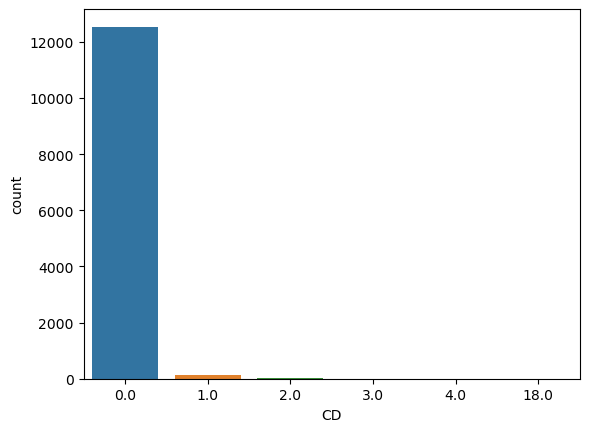

In [12]:
sns.countplot(train['CD'])

최빈값? 중앙값?

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K', ylabel='count'>

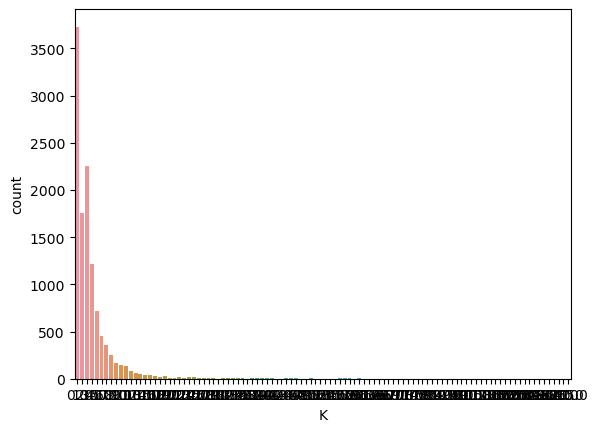

In [13]:
sns.countplot(train['K'])

In [14]:
train['CD'].value_counts()

0.0     12543
1.0       138
2.0        16
3.0         2
4.0         1
18.0        1
Name: CD, dtype: int64

In [15]:
train['K'].value_counts()

0.0      3729
2.0      2251
1.0      1754
3.0      1219
4.0       718
         ... 
183.0       1
391.0       1
113.0       1
115.0       1
71.0        1
Name: K, Length: 102, dtype: int64

In [16]:
train['K'].unique()

array([ 27.,  nan,   0.,   2.,  18.,  12.,   1.,   9.,   6.,   3.,   4.,
        11.,   7.,  15.,   5.,  10.,  17.,  13.,   8.,  38.,  28.,  20.,
        14.,  32.,  23.,  16.,  57.,  26.,  73.,  24.,  41.,  76.,  59.,
        64., 254.,  19.,  25.,  44.,  34.,  43.,  78.,  33.,  48.,  37.,
        46.,  21.,  84.,  40.,  56.,  67., 705.,  51.,  30.,  22.,  58.,
       226.,  66., 108.,  39., 135., 107.,  31., 582., 238.,  50.,  60.,
       640., 636.,  53.,  61., 309.,  36., 105., 183., 391.,  52., 113.,
       115.,  99.,  65., 158.,  35.,  94.,  63.,  29., 100.,  47.,  93.,
        98.,  74., 128.,  49.,  69.,  91., 269.,  55., 375.,  42.,  70.,
        54.,  79.,  81.,  71.])

In [17]:
pd.set_option('display.max_rows', 500)
train.isnull().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

Text(0.5, 1.0, 'Y_label distribution')

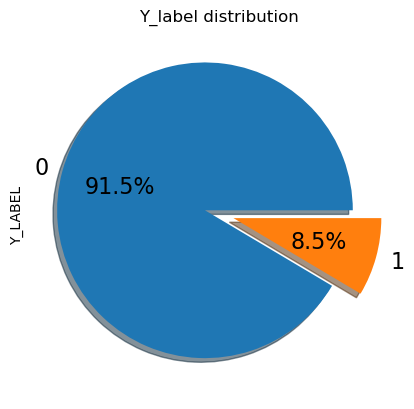

In [18]:
train['Y_LABEL'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, 
                                             textprops={'fontsize':16}).set_title("Y_label distribution")

<AxesSubplot:xlabel='K', ylabel='Count'>

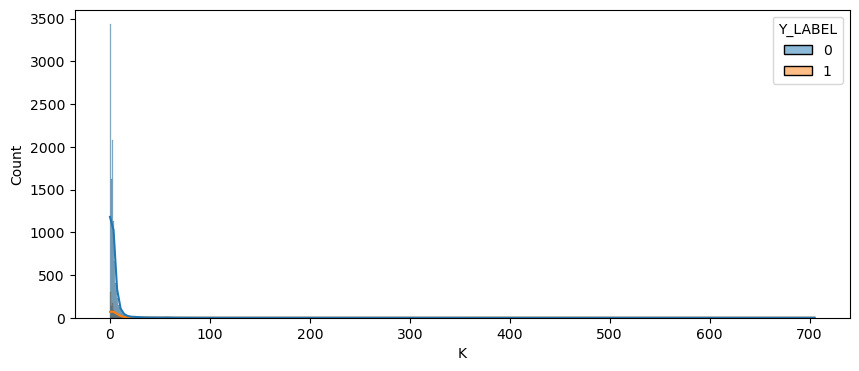

In [19]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='K', hue='Y_LABEL', binwidth=1,kde=True)


<AxesSubplot:>

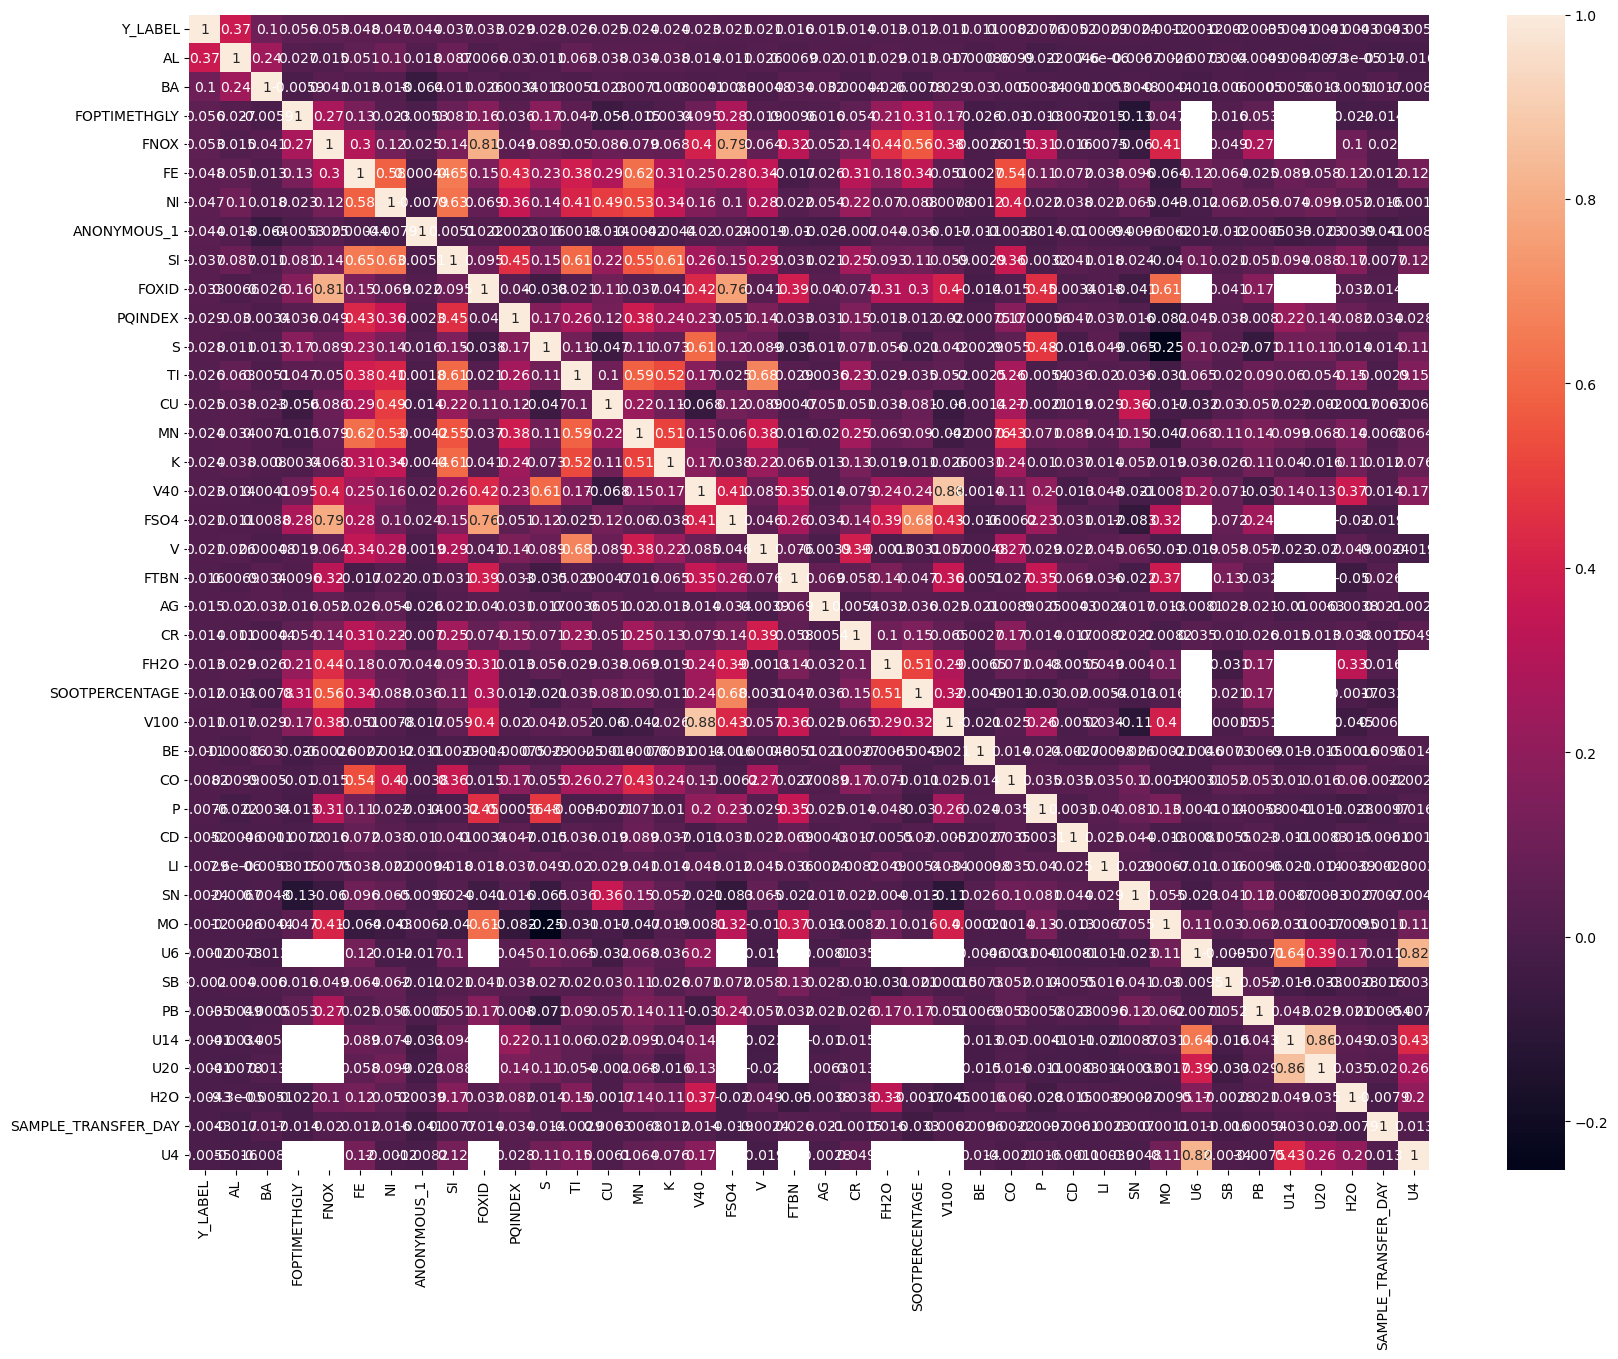

In [20]:
corr=train.corr()
top_corr=train[corr.nlargest(40,'Y_LABEL')['Y_LABEL'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

<AxesSubplot:>

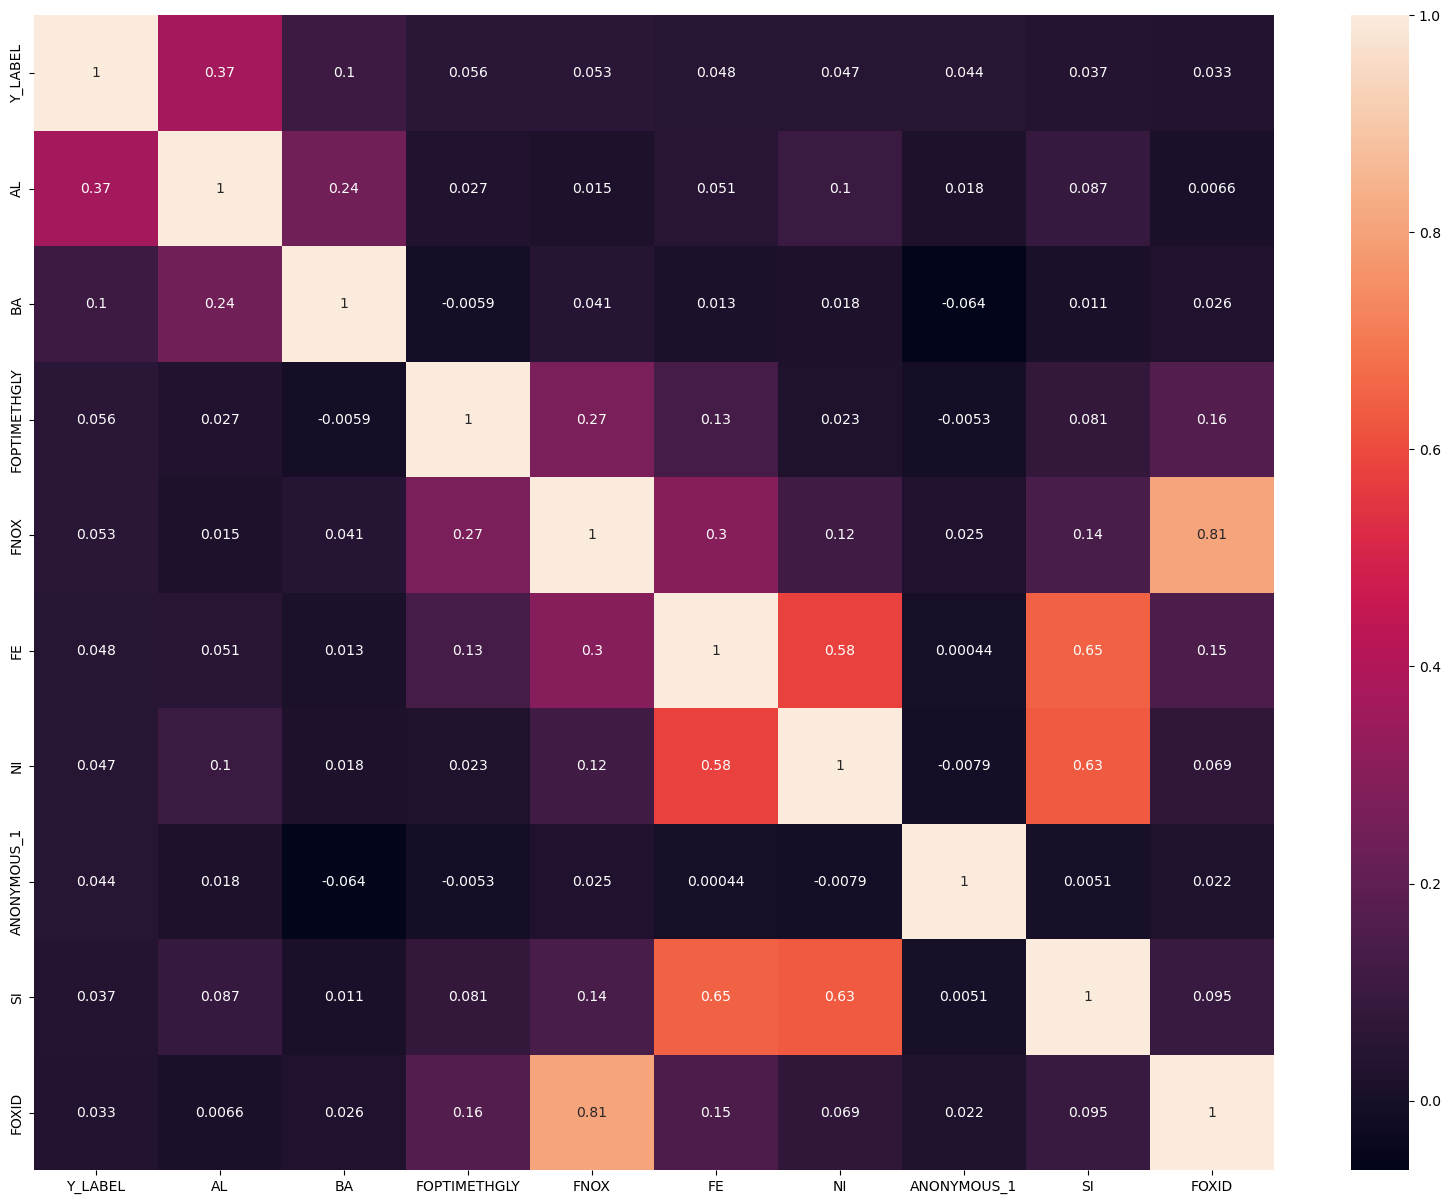

In [21]:
corr=train.corr()
top_corr=train[corr.nlargest(10,'Y_LABEL')['Y_LABEL'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

In [15]:
train['Y_LABEL'].value_counts()

0    12892
1     1203
Name: Y_LABEL, dtype: int64

In [17]:
len(train.loc[train['AL'] > 9])

1225

In [19]:
len(train.loc[train['AL'] <= 9])

12870

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AL', ylabel='Y_LABEL'>

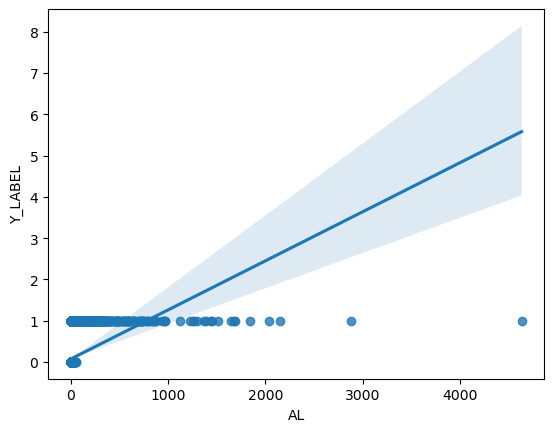

In [22]:
sns.regplot(train['AL'], train['Y_LABEL'])

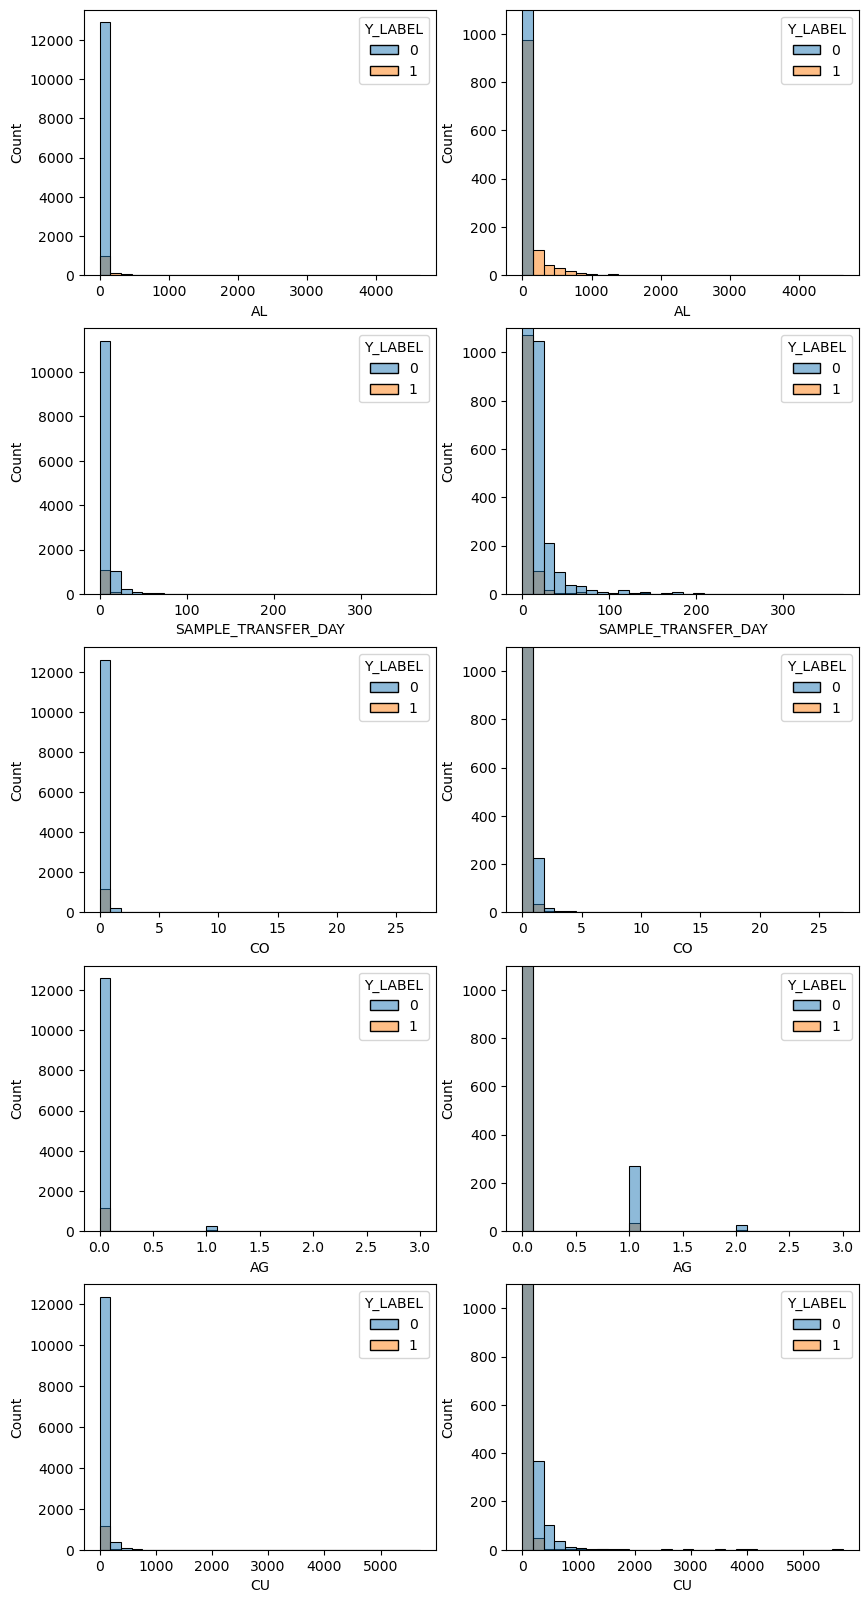

In [28]:
exp_features=['AL', 'SAMPLE_TRANSFER_DAY', 'CO', 'AG', 'CU']

fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_features):
    # 왼쪽 열
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Y_LABEL')
    
    # 오른쪽 열, y축 범위를 200까지해서 잘 안보이는 부분을 확대함
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Y_LABEL')
    plt.ylim([0,1100])
plt.show()

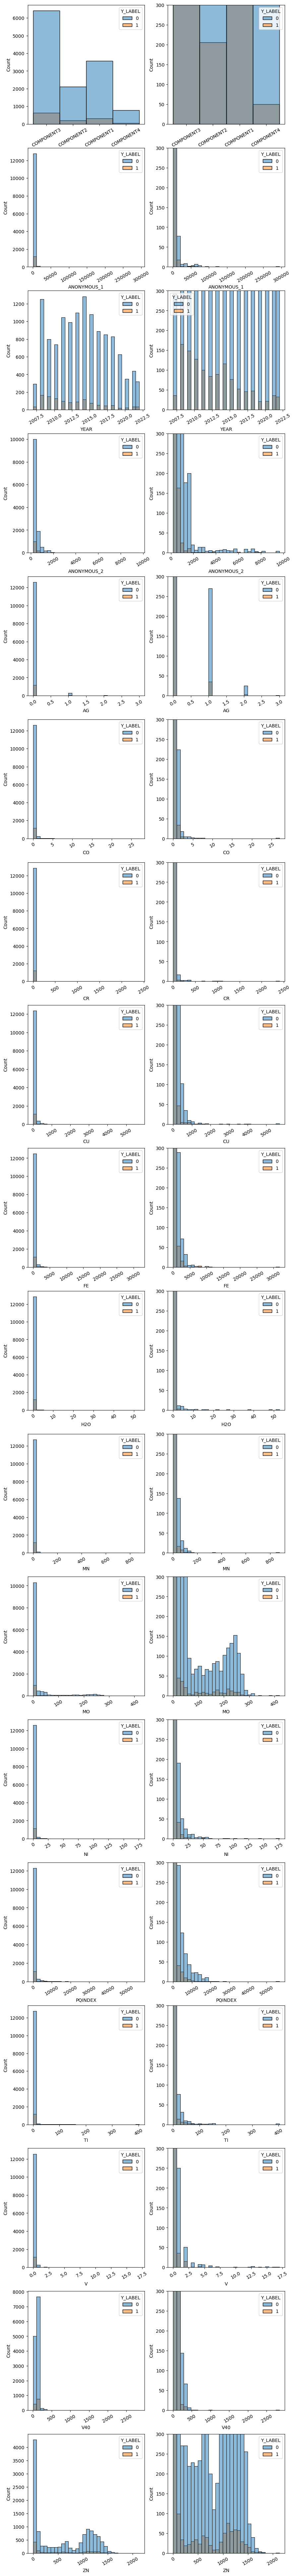

In [37]:
exp_features=['COMPONENT_ARBITRARY','ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG', 'CO','CR','CU','FE','H2O','MN','MO','NI',
             'PQINDEX','TI','V','V40','ZN']

fig=plt.figure(figsize=(10,100))
for i, var_name in enumerate(exp_features):
    # 왼쪽 열
    ax=fig.add_subplot(18,2,2*i+1)
    plt.xticks(rotation=30)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Y_LABEL')
    
    # 오른쪽 열, y축 범위를 200까지해서 잘 안보이는 부분을 확대함
    ax=fig.add_subplot(18,2,2*i+2)
    plt.xticks(rotation=30)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Y_LABEL')
    plt.ylim([0,300])
plt.show()

<AxesSubplot:ylabel='COMPONENT_ARBITRARY'>

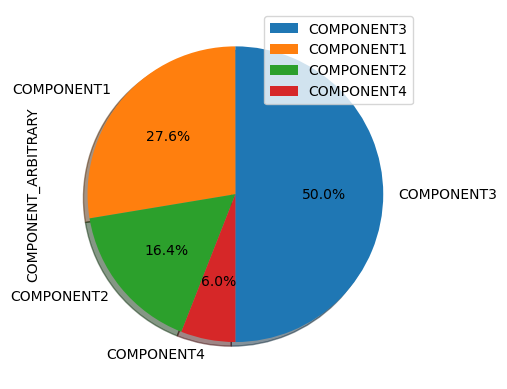

In [31]:
train['COMPONENT_ARBITRARY'].value_counts().plot(kind="pie",autopct = '%1.1f%%',shadow=True, 
                                    startangle = -90,legend = True)

In [40]:
pd.set_option('display.max_rows', 500)
train.isnull().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

In [46]:
train

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,PQINDEX,S,SB,SI,SN,TI,V,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,8504,21370,0,427,2,5,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,19,1117,0,0,0,0,0,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,17,1334,0,0,1,0,0,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,44,21774,2,1,1,0,0,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,217,18470,0,2,0,0,0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,8,200,0,2,201,1,...,35,22000,0,2,0,0,0,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,2,200,0,3,85,0,...,9,5494,0,5,0,0,0,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,9,550,0,6,0,1,...,645,9640,2,18,0,0,0,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,19,550,0,2,4,0,...,11,1313,0,0,0,0,0,44.3,652,0


In [41]:
train.drop(['FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4', 'FTBN', 'FUEL','SOOTPERCENTAGE', 'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V100'],axis=1,inplace=True)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [48]:
cols=list(train)
print(cols)

['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA', 'CD', 'CO', 'CR', 'CU', 'FE', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI', 'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'TI', 'V', 'V40', 'ZN', 'Y_LABEL']


In [49]:
len(cols)

37

In [50]:
numeric_features = train.dtypes[train.dtypes != 'object'].index

In [51]:
len(numeric_features)

35

<AxesSubplot:>

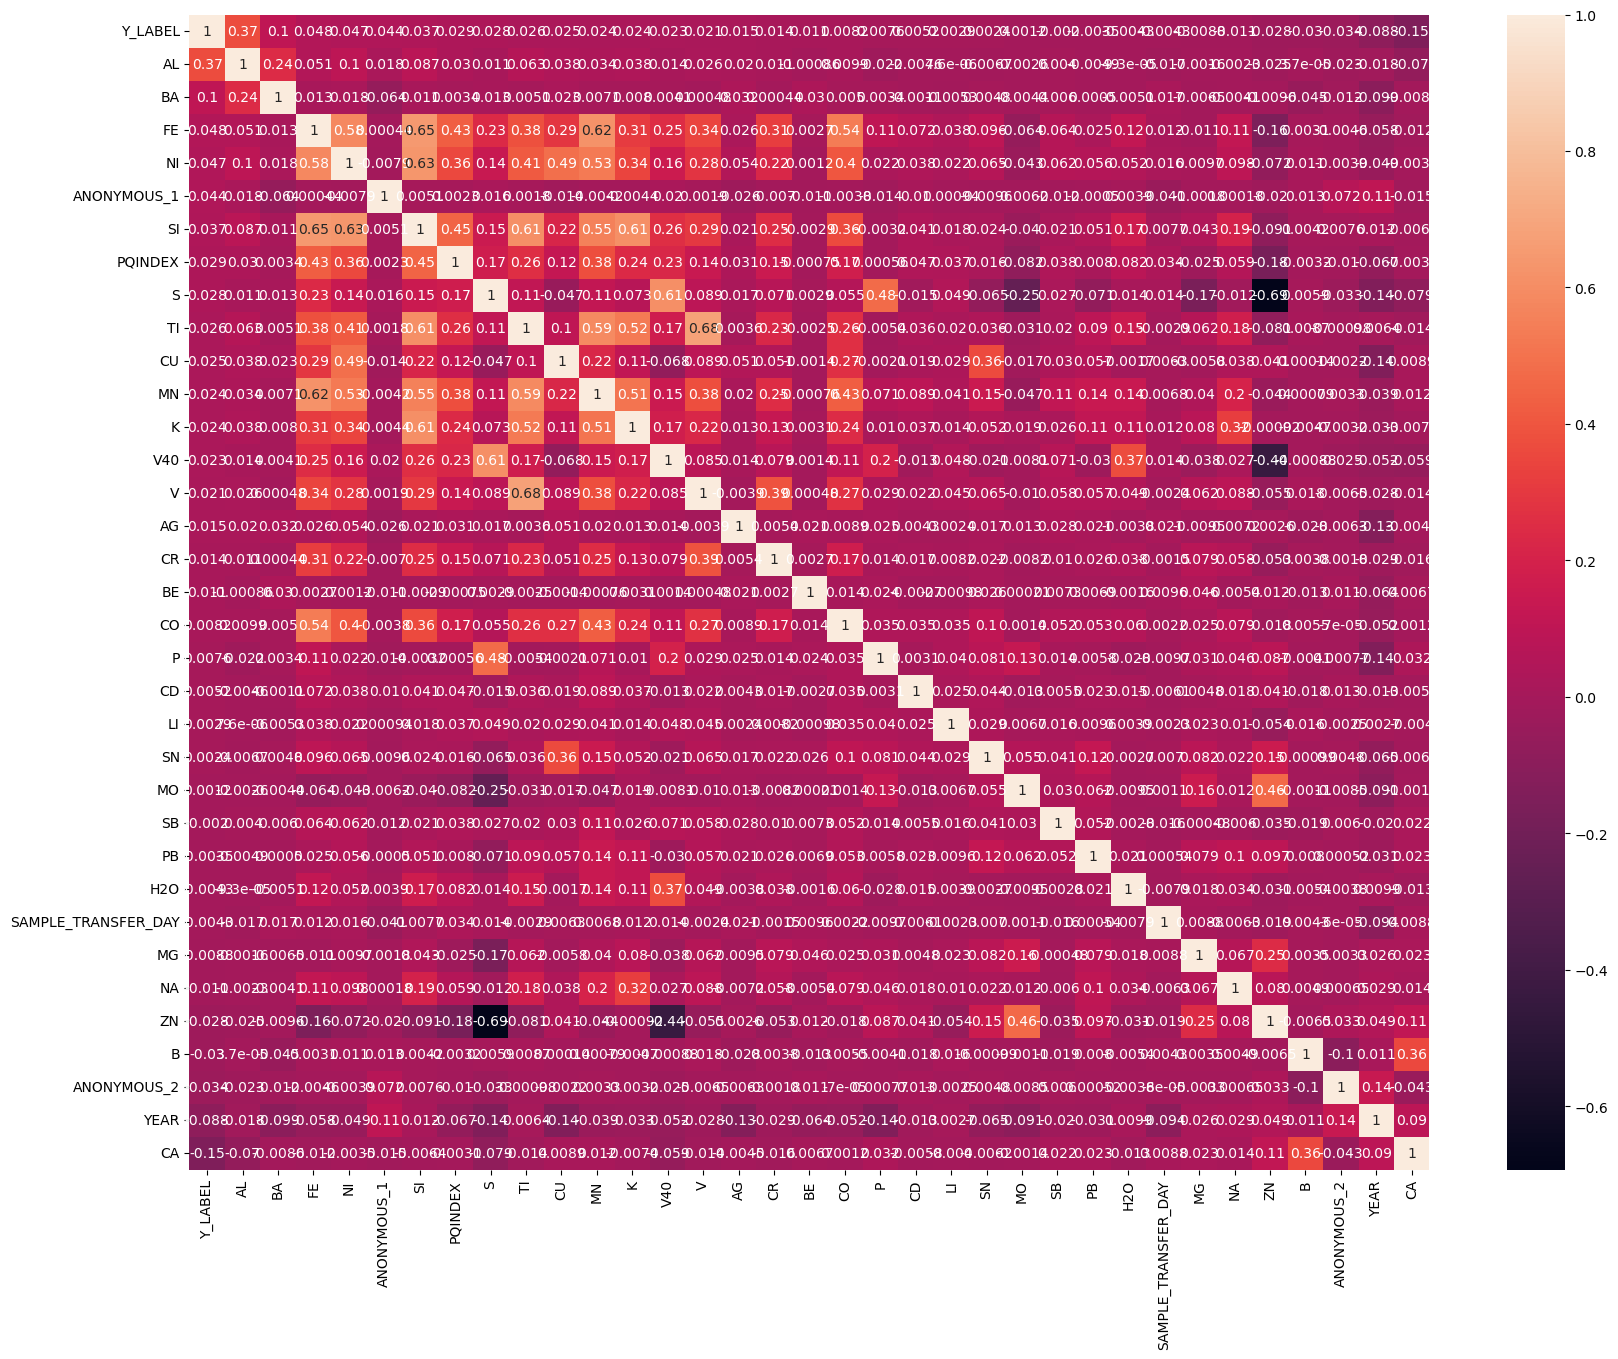

In [52]:
corr=train.corr()
top_corr=train[corr.nlargest(35,'Y_LABEL')['Y_LABEL'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

<AxesSubplot:>

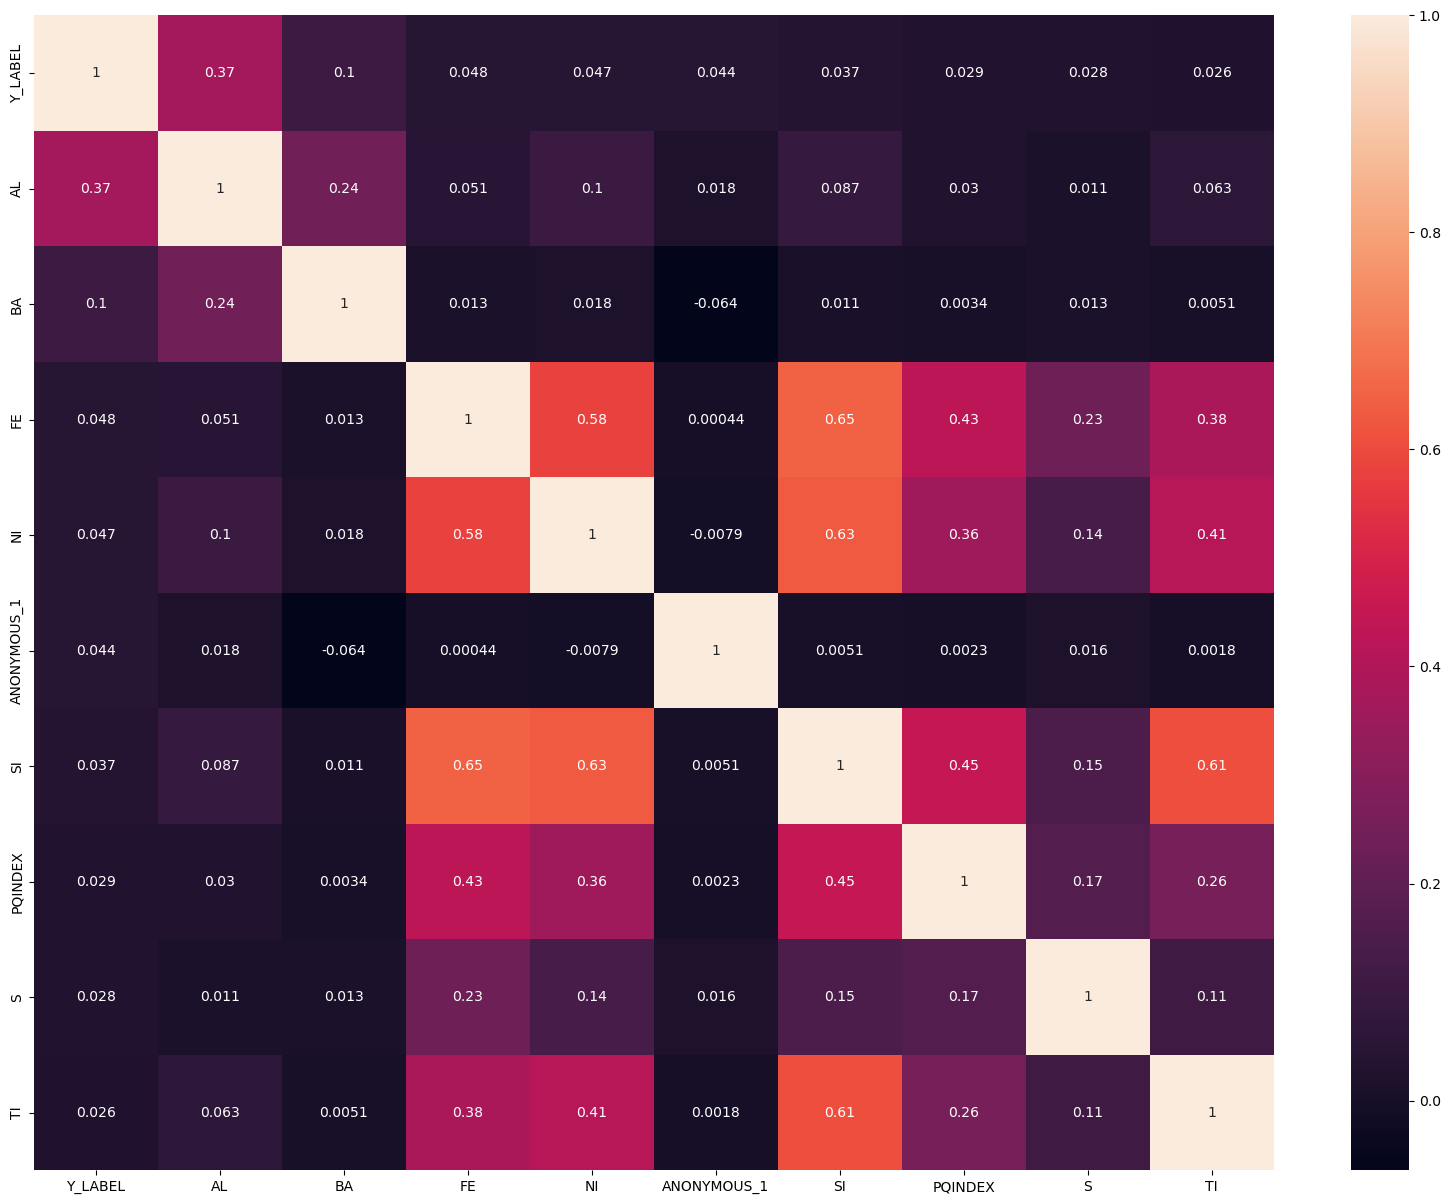

In [53]:
corr=train.corr()
top_corr=train[corr.nlargest(10,'Y_LABEL')['Y_LABEL'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

In [65]:
train['CD'] = train['CD'].fillna(0)

In [56]:
train['K'] = train['K'].fillna(train['K'].mode()[0])

In [59]:
train.isnull().sum()

ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
SAMPLE_TRANSFER_DAY    0
ANONYMOUS_2            0
AG                     0
AL                     0
B                      0
BA                     0
BE                     0
CA                     0
CD                     0
CO                     0
CR                     0
CU                     0
FE                     0
H2O                    0
K                      0
LI                     0
MG                     0
MN                     0
MO                     0
NA                     0
NI                     0
P                      0
PB                     0
PQINDEX                0
S                      0
SB                     0
SI                     0
SN                     0
TI                     0
V                      0
V40                    0
ZN                     0
Y_LABEL                0
dtype: int64

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BA', ylabel='count'>

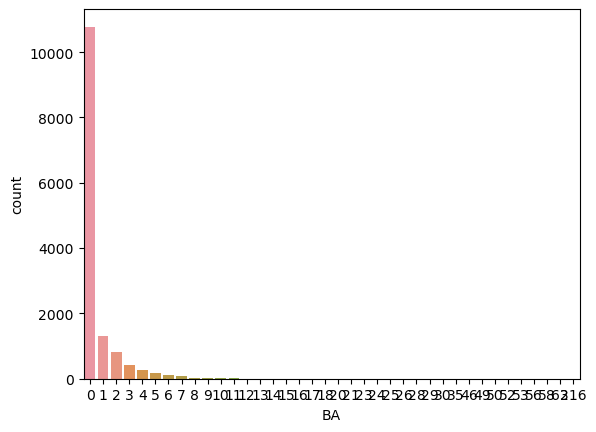

In [68]:
sns.countplot(train['BA'])

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AL', ylabel='count'>

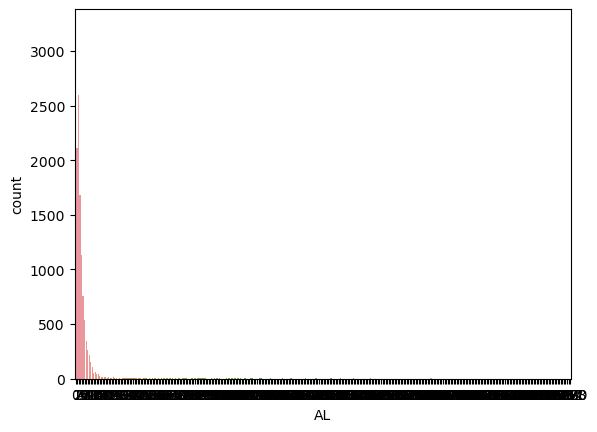

In [67]:
sns.countplot(train['AL'])

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CD', ylabel='count'>

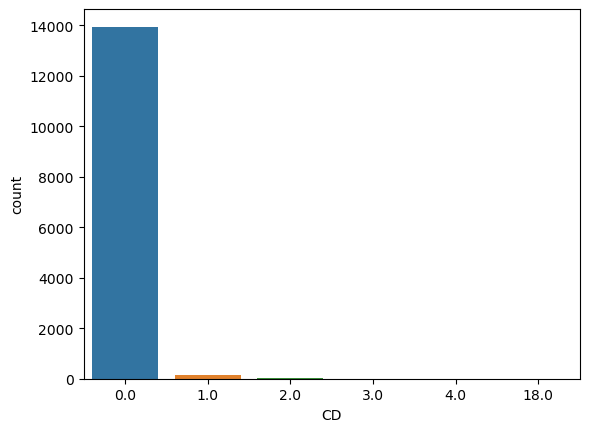

In [66]:
sns.countplot(train['CD'])

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K', ylabel='count'>

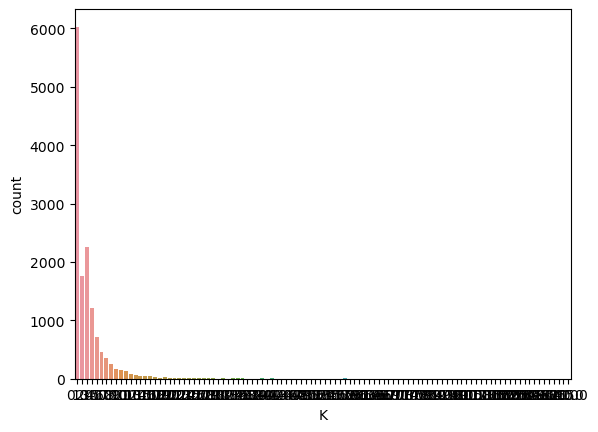

In [61]:
sns.countplot(train['K'])